In [3]:
import polars as pl

# Create a sample Polars DataFrame with a column containing dictionaries
data = {
    "group": [
        {"category": "A", "value": 10},
        {"category": "B", "value": 20},
        {"category": "A", "value": 15},
        {"category": "B", "value": 25},
        {"category": "C", "value": 5},
    ]
}

df = pl.DataFrame(data)
print(df)

# Group by the 'group' column and perform aggregation
agg_df = df.group_by("group")

# Show the aggregated DataFrame
print(agg_df)


shape: (5, 1)
┌───────────┐
│ group     │
│ ---       │
│ struct[2] │
╞═══════════╡
│ {"A",10}  │
│ {"B",20}  │
│ {"A",15}  │
│ {"B",25}  │
│ {"C",5}   │
└───────────┘


In [6]:
import polars as pl

# Create a sample Polars DataFrame with a column containing dictionaries and an "abundance" column
data = {
    "group": [
        {"category": "A", "value": 10},
        {"category": "B", "value": 20},
        {"category": "A", "value": 10},
        {"category": "B", "value": 25},
        {"category": "C", "value": 5},
    ],
    "abundance": [100, 200, 150, 250, 50],
}

df = pl.DataFrame(data)
print(df)
# Group by the 'group' column and perform aggregations on 'value' and 'abundance'
agg_df = df.groupby("group").agg(
    # pl.sum("group.value").alias("total_value"),
    pl.sum("abundance").alias("total_abundance")
)

# Show the aggregated DataFrame
print(agg_df)


shape: (5, 2)
┌───────────┬───────────┐
│ group     ┆ abundance │
│ ---       ┆ ---       │
│ struct[2] ┆ i64       │
╞═══════════╪═══════════╡
│ {"A",10}  ┆ 100       │
│ {"B",20}  ┆ 200       │
│ {"A",10}  ┆ 150       │
│ {"B",25}  ┆ 250       │
│ {"C",5}   ┆ 50        │
└───────────┴───────────┘
shape: (4, 2)
┌───────────┬─────────────────┐
│ group     ┆ total_abundance │
│ ---       ┆ ---             │
│ struct[2] ┆ i64             │
╞═══════════╪═════════════════╡
│ {"B",20}  ┆ 200             │
│ {"A",10}  ┆ 250             │
│ {"C",5}   ┆ 50              │
│ {"B",25}  ┆ 250             │
└───────────┴─────────────────┘


/var/folders/9w/cn8tqbv976gckxd0c9cbr1sw0000gn/T/ipykernel_88911/2677954702.py:18: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  agg_df = df.groupby("group").agg(


In [13]:
import hashlib
import json

my_dict = {'key1': 'value1', 'key2': 'value2'}
my_dict_same = {'key1': 'value1', 'key2': 'value2'}
my_dict_diff_val_key1 = {'key1': 'value2', 'key2': 'value2'}
my_dict_diff_key_key1 = {'key1a': 'value2', 'key2': 'value2'}

dicts = {"my_dict": my_dict, "my_dict_same": my_dict_same, "my_dict_diff_val_key1": my_dict_diff_val_key1, "my_dict_diff_key_key1": my_dict_diff_key_key1}

# Convert the dictionary to a JSON string and then hash it
dicts_hashed = []
for name, dict in dicts.items():
    # json_str = json.dumps(dict, sort_keys=True)
    # hashed_value = hashlib.sha256(json_str.encode()).hexdigest()
    hashed_value = hash_dict(dict)
    print(f"{name} {hashed_value}")

my_dict 6366030fcfbc5e29da7855c8a2c2c0c48670a1cc067d7dbeb1481865105f9515
my_dict_same 6366030fcfbc5e29da7855c8a2c2c0c48670a1cc067d7dbeb1481865105f9515
my_dict_diff_val_key1 cb6658aba52d31161be15f48cab3694efa9ad9d94b92051e4a5ea62bcfe75236
my_dict_diff_key_key1 d869caa4c5b91838c00a8e12dba14c83b9cbb70860593f8fb15e857bea2752ff


In [12]:
def hash_dict(dict):
    json_str = json.dumps(dict, sort_keys=True)
    hashed_value = hashlib.sha256(json_str.encode()).hexdigest()
    return hashed_value

In [17]:
import hashlib
import json

def hash_nested_dict(d):
    # Convert the nested dictionary to a JSON string with sorted keys
    json_str = json.dumps(d, sort_keys=True)
    print(json_str)

    # Hash the JSON string using a cryptographic hash function (e.g., SHA-256)
    hash_obj = hashlib.sha256()
    hash_obj.update(json_str.encode())
    return hash_obj.hexdigest()

# Example nested dictionary
nested_dict = {
    'key1': 'value1',
    'key2': {
        'key3': 'value3',
        'key4': [1, 2, 3]
    }
}

nested_dict2 = {
    'key1': 'value2',
    'key2': {
        'key3': 'value3',
        'key4': [1, 2, 3]
    }
}

# Calculate the hash of the nested dictionary
print("Hash of nested_dict: ", hash_nested_dict(nested_dict))
print("Hash of nested_dict2:", hash_nested_dict(nested_dict2))


{"key1": "value1", "key2": {"key3": "value3", "key4": [1, 2, 3]}}
Hash of nested_dict:  57555074be317f8e1f3b7f266d0b28bab5cb21736f39d5956469c4ed422dd193
{"key1": "value2", "key2": {"key3": "value3", "key4": [1, 2, 3]}}
Hash of nested_dict2: 6dd89a16783c1f454fd303e18d57f28ae5fb175848e5990d03d3f1cd6661a7ba


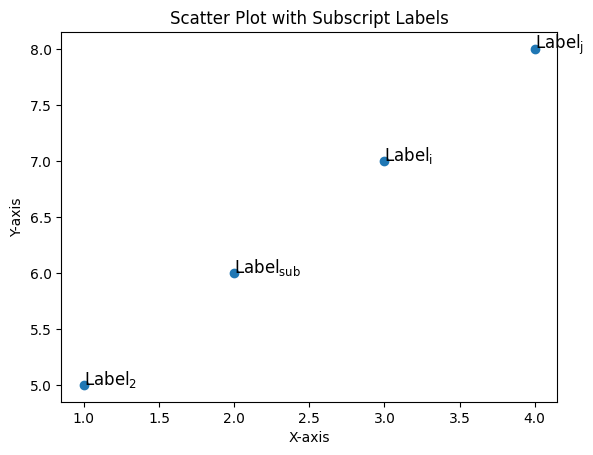

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Enable Matplotlib's built-in math rendering
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Sample data
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]
labels = ['$Label_2$', '$Label_{sub}$', '$Label_i$', '$Label_j$']

# Create a scatter plot with labels containing subscripts
plt.scatter(x, y)
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Subscript Labels')
plt.show()


In [1]:
import pandas as pd

# Sample data
data = [
    ["**Bold Text**", "Value 1"],
    ["*Italic Text*", "Value 2"],
    ["[Link](https://example.com)", "Value 3"],
]

# Create a DataFrame
df = pd.DataFrame(data, columns=["Markdown Text", "Regular Text"])

# Display the DataFrame in a Jupyter Notebook cell
df


,Markdown Text,Regular Text
0,**Bold Text**,Value 1
1,*Italic Text*,Value 2
2,[Link](https://example.com),Value 3


In [5]:
import polars as pl

# Sample data
data = [
    ["**Bold Text**", "Value 1"],
    ["*Italic Text*", "Value 2"],
    ["[Link](https://example.com)", "Value 3"],
]

# Create a Polars DataFrame
df = pl.DataFrame(data, schema=["Markdown Text", "Regular Text"])

# Display the Polars DataFrame with Markdown rendering
df.with_columns(df["Markdown Text"].map_elements(lambda x: f"`{x}`")).select(["Markdown Text", "Regular Text"])


Markdown Text,Regular Text
str,str
"""`**Bold Text**…","""Value 1"""
"""`*Italic Text*…","""Value 2"""
"""`[Link](https:…","""Value 3"""


In [6]:
from IPython.display import Markdown

latex = "$^{12}C^{13}C$"
Markdown(latex)


$^{12}C^{13}C$

In [14]:
import matplotlib.pyplot as plt

# Define a variable containing the string you want to insert
variable_value = "$^{12}C^{13}C$"

# Create a non-LaTeX-formatted label with the variable value
label = "This is non-italic text with " + variable_value

# Create a sample plot
plt.plot([1, 2, 3], [2, 4, 6])

# Add the non-LaTeX-formatted label to the plot
plt.text(1, 4, label, fontsize=12)

# Show the plot
plt.show()


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>